<a href="https://colab.research.google.com/github/simonefmr/mvp_pucrio/blob/main/Sprint2_MVP_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós Graduação Ciência de Dados - PUC Rio**
# **MVP Sprint II A - Machine Learning**

## *Análise de Churn de uma empresa de telefonia - Idendificação de possíveis cancelamentos nos serviços*

## Aluna: Simone de Fátima Marques Ramos

## **1. Introdução**

O objetivo deste trabalho é utilizar técnicas e recursos de machine learning para tentar prever a possibilidade de cancelamento de serviços (Churn) em uma empresa de telefonia.

Churn é uma métrica utilizada para mostrar o número de clientes que cancelam serviço em um determinado período de tempo. Ela é importante pois ajuda a medir a expansão da sua empresa, já que é preciso que o número de novos negócios exceda esse indicador ou realizar campanhas para reversão destes cancelamentos e fidelização.

O dataset apresenta diversos serviços oferecidos por esta empresa além de dados pessoais dos clientes como estado civil, filhos etc. Num mercado competitivo, entender o que fideliza os clientes e os pontos sensíveis que os fazem evadir pode ser crucial para a longevidade do negócio.

Serão utilizadas métricas de avaliação dos modelos de regressão, onde experimentaremos algoritmos e construiremos um modelo de regressão.

**Atributos**

Serão avaliados neste dataset os seguintes atributos:

*Pessoais*: Maior de 65 Anos, Conjuge, Dependentes.

*Comerciais/Financeiros*: Meses De Contrato, Telefone Fixo, Varias Linhas Telefonicas, Servico De Internet (tipo), Seguranca Online (antivirus), Backup Online (armazenamento em nuvem), Seguro No Dispositivo, Suporte Tecnico, TV a Cabo, Streaming De Filmes, Tipo De Contrato, Pagamento Online, Forma De Pagamento, Conta Mensal.

*Coluna alvo (target)*: Churn (índice de cancelamentos em determinado período)

## **2. Tratamento de dados**


In [104]:
# Importando as bibliotecas

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Carga do Dataset

In [105]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/simonefmr/mvp_pucrio/main/Customer-Churn.csv"

# Lê o arquivo
dataset = pd.read_csv(url, sep=',')

# Dimensões do dataset
dataset.shape

(7043, 18)

In [106]:
dataset.columns

Index(['Maior65Anos', 'Conjuge', 'Dependentes', 'MesesDeContrato',
       'TelefoneFixo', 'VariasLinhasTelefonicas', 'ServicoDeInternet',
       'SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo',
       'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'TipoDeContrato',
       'PagamentoOnline', 'FormaDePagamento', 'ContaMensal', 'Churn'],
      dtype='object')

In [107]:
# Mostra as 5 primeiras linhas do dataset
dataset.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [108]:
#modificação de forma manual
traducao_dic = {'Sim': 1,
                'Nao': 0}

dataset['Conjuge'] = dataset['Conjuge'].replace(traducao_dic)

dataset['Dependentes'] = dataset['Dependentes'].replace(traducao_dic)

dataset['TelefoneFixo'] = dataset['TelefoneFixo'].replace(traducao_dic)

dataset['PagamentoOnline'] = dataset['PagamentoOnline'].replace(traducao_dic)

dataset['Churn'] = dataset['Churn'].replace(traducao_dic)

dataset.head(5)


,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.85,0
1,0,0,0,34,1,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,0,ChequePapel,56.95,0
2,0,0,0,2,1,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,53.85,1
3,0,0,0,45,0,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,0,DebitoEmConta,42.30,0
4,0,0,0,2,1,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,70.70,1


In [109]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dataset.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dataset_final = pd.concat([dataset, dummie_dados], axis=1)

dataset_final

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,SemServicoTelefonico,DSL,Nao,Sim,Nao,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,Nao,DSL,Sim,Nao,Sim,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,Nao,DSL,Sim,Sim,Nao,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,SemServicoTelefonico,DSL,Sim,Nao,Sim,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,Nao,FibraOptica,Nao,Nao,Nao,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,Sim,DSL,Sim,Nao,Sim,...,0,0,1,0,0,1,0,0,1,0
7039,0,1,1,72,1,Sim,FibraOptica,Nao,Sim,Sim,...,0,0,1,0,0,1,1,0,0,0
7040,0,1,1,11,0,SemServicoTelefonico,DSL,Sim,Nao,Nao,...,1,0,0,0,1,0,0,1,0,0
7041,1,1,0,4,1,Sim,FibraOptica,Nao,Nao,Nao,...,1,0,0,0,1,0,0,0,1,0


### Tratamento de Missings

In [110]:
# verificando nulls no dataset
dataset_final.isnull().sum()

Maior65Anos                                     0
Conjuge                                         0
Dependentes                                     0
MesesDeContrato                                 0
TelefoneFixo                                    0
VariasLinhasTelefonicas                         0
ServicoDeInternet                               0
SegurancaOnline                                 0
BackupOnline                                    0
SeguroNoDispositivo                             0
SuporteTecnico                                  0
TVaCabo                                         0
StreamingDeFilmes                               0
TipoDeContrato                                  0
PagamentoOnline                                 0
FormaDePagamento                                0
ContaMensal                                     0
Churn                                           0
Maior65Anos                                     0
MesesDeContrato                                 0


Não foram identificados valores nulos para tratamento.

In [111]:
# Descartando colunas que foram categorizadas pelo Get Dummies

dataset_final = dataset_final.drop('VariasLinhasTelefonicas', axis=1)
dataset_final = dataset_final.drop('ServicoDeInternet', axis=1)
dataset_final = dataset_final.drop('SegurancaOnline', axis=1)
dataset_final = dataset_final.drop('BackupOnline', axis=1)
dataset_final = dataset_final.drop('SeguroNoDispositivo', axis=1)
dataset_final = dataset_final.drop('SuporteTecnico', axis=1)
dataset_final = dataset_final.drop('TVaCabo', axis=1)
dataset_final = dataset_final.drop('StreamingDeFilmes', axis=1)
dataset_final = dataset_final.drop('TipoDeContrato', axis=1)
dataset_final = dataset_final.drop('FormaDePagamento', axis=1)

In [112]:
# Busco informações sobre contagem de não nulos e tipo de cada atributo

dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Maior65Anos                                   7043 non-null   int64  
 1   Conjuge                                       7043 non-null   int64  
 2   Dependentes                                   7043 non-null   int64  
 3   MesesDeContrato                               7043 non-null   int64  
 4   TelefoneFixo                                  7043 non-null   int64  
 5   PagamentoOnline                               7043 non-null   int64  
 6   ContaMensal                                   7043 non-null   float64
 7   Churn                                         7043 non-null   int64  
 8   Maior65Anos                                   7043 non-null   int64  
 9   MesesDeContrato                               7043 non-null   i

In [113]:
# Converter todas as colunas do tipo uint8 para int
dataset_final = dataset_final.astype({'VariasLinhasTelefonicas_Nao': int,
                                      'VariasLinhasTelefonicas_Sim': int,
                                      'VariasLinhasTelefonicas_SemServicoTelefonico': int,
                                      'ServicoDeInternet_FibraOptica': int,
                                      'ServicoDeInternet_Nao': int,
                                      'ServicoDeInternet_DSL': int,
                                      'SegurancaOnline_Nao': int,
                                      'SegurancaOnline_SemServicoDeInternet': int,
                                      'SegurancaOnline_Sim': int,
                                      'BackupOnline_Nao': int,
                                      'BackupOnline_SemServicoDeInternet': int,
                                      'BackupOnline_Sim': int,
                                      'SeguroNoDispositivo_Nao': int,
                                      'SeguroNoDispositivo_SemServicoDeInternet': int,
                                      'SeguroNoDispositivo_Sim': int,
                                      'SuporteTecnico_Nao': int,
                                      'SuporteTecnico_SemServicoDeInternet': int,
                                      'SuporteTecnico_Sim': int,
                                      'TVaCabo_Nao': int,
                                      'TVaCabo_SemServicoDeInternet': int,
                                      'TVaCabo_Sim': int,
                                      'StreamingDeFilmes_Nao': int,
                                      'StreamingDeFilmes_SemServicoDeInternet': int,
                                      'StreamingDeFilmes_Sim': int,
                                      'TipoDeContrato_DoisAnos': int,
                                      'TipoDeContrato_Mensalmente': int,
                                      'TipoDeContrato_UmAno': int,
                                      'FormaDePagamento_CartaoDeCredito': int,
                                      'FormaDePagamento_ChequeDigital': int,
                                      'FormaDePagamento_ChequePapel': int,
                                      'FormaDePagamento_DebitoEmConta': int})

## 2.1 Separação em conjunto de treino e conjunto de teste

Nosso problema de negócios é a possibilidade de evasão do cliente, desta forma, o atributo-alvo da análise será o 'Churn'. Foi separado 70% do conjunto de dados para treinamento e 30% para teste.

Com o objetivo de lidar com os efeitos da aleatoriedade na divisão dos conjuntos, preparamos também os dados para posterior utilização da validação-cruzada usando a técnica de K-Fold com 10 subdivisões.

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Definir os modelos que deseja avaliar
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

X = dataset_final.drop('Churn', axis=1)
y = dataset_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Avaliação dos modelos
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Logistic Regression: 0.802840 (0.008739)
Decision Tree: 0.727181 (0.008412)
Random Forest: 0.783570 (0.004379)


## 2.2 Modelagem e Inferência

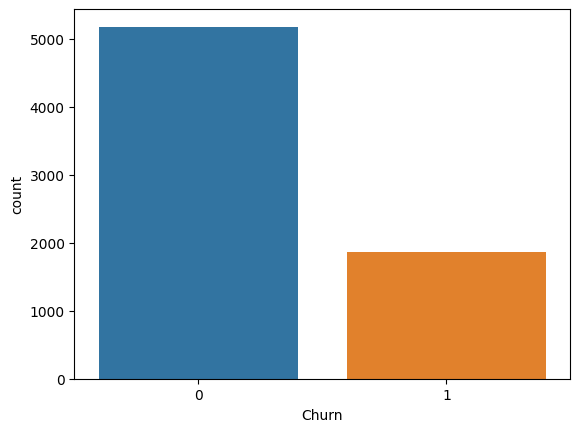

In [116]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dataset_final)

In [118]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

# dividindo os dados em caracteristicas e target
X = dataset_final.drop('Churn', axis = 1)
y = dataset_final['Churn']

smt = SMOTE(random_state=42)
X, y = smt.fit_resample(X, y)

#junção dos dados balanceados
dataset_final = pd.concat([X, y], axis=1)

#verificação 1 - junção dos dados
dataset_final.head(10)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Maior65Anos,MesesDeContrato,ContaMensal,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,0,1,0,1,0,1,29.85,0,1,29.85,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,34,1,0,56.95,0,34,56.95,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,2,1,1,53.85,0,2,53.85,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,45,0,0,42.30,0,45,42.30,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,2,1,1,70.70,0,2,70.70,...,0,0,0,1,0,0,1,0,0,1
5,0,0,0,8,1,1,99.65,0,8,99.65,...,0,1,0,1,0,0,1,0,0,1
6,0,0,1,22,1,1,89.10,0,22,89.10,...,0,0,0,1,0,1,0,0,0,0
7,0,0,0,10,0,0,29.75,0,10,29.75,...,0,0,0,1,0,0,0,1,0,0
8,0,1,0,28,1,1,104.80,0,28,104.80,...,0,1,0,1,0,0,1,0,0,1
9,0,0,1,62,1,0,56.15,0,62,56.15,...,0,0,0,0,1,0,0,0,1,0


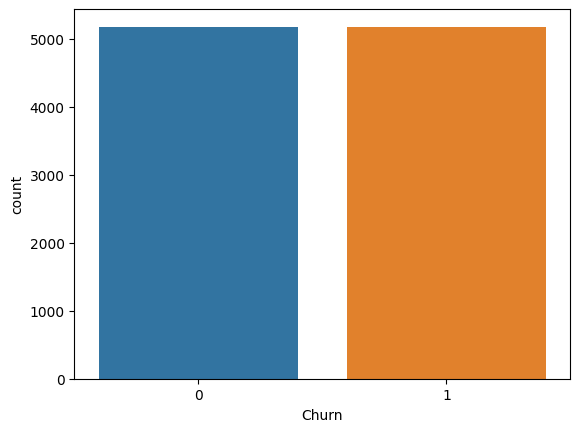

In [119]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dataset_final)

## 2.3 Criação e avaliação de modelos: linha base

LR: 0.800000 (0.017781)
KNN: 0.768966 (0.015619)
CART: 0.725558 (0.016996)
NB: 0.683367 (0.023418)
SVM: 0.789047 (0.018502)
Bagging: 0.783570 (0.023795)
RF: 0.781542 (0.019201)
ET: 0.768560 (0.015671)
Ada: 0.801623 (0.024690)
GB: 0.798580 (0.021197)
Voting: 0.796146 (0.020065)


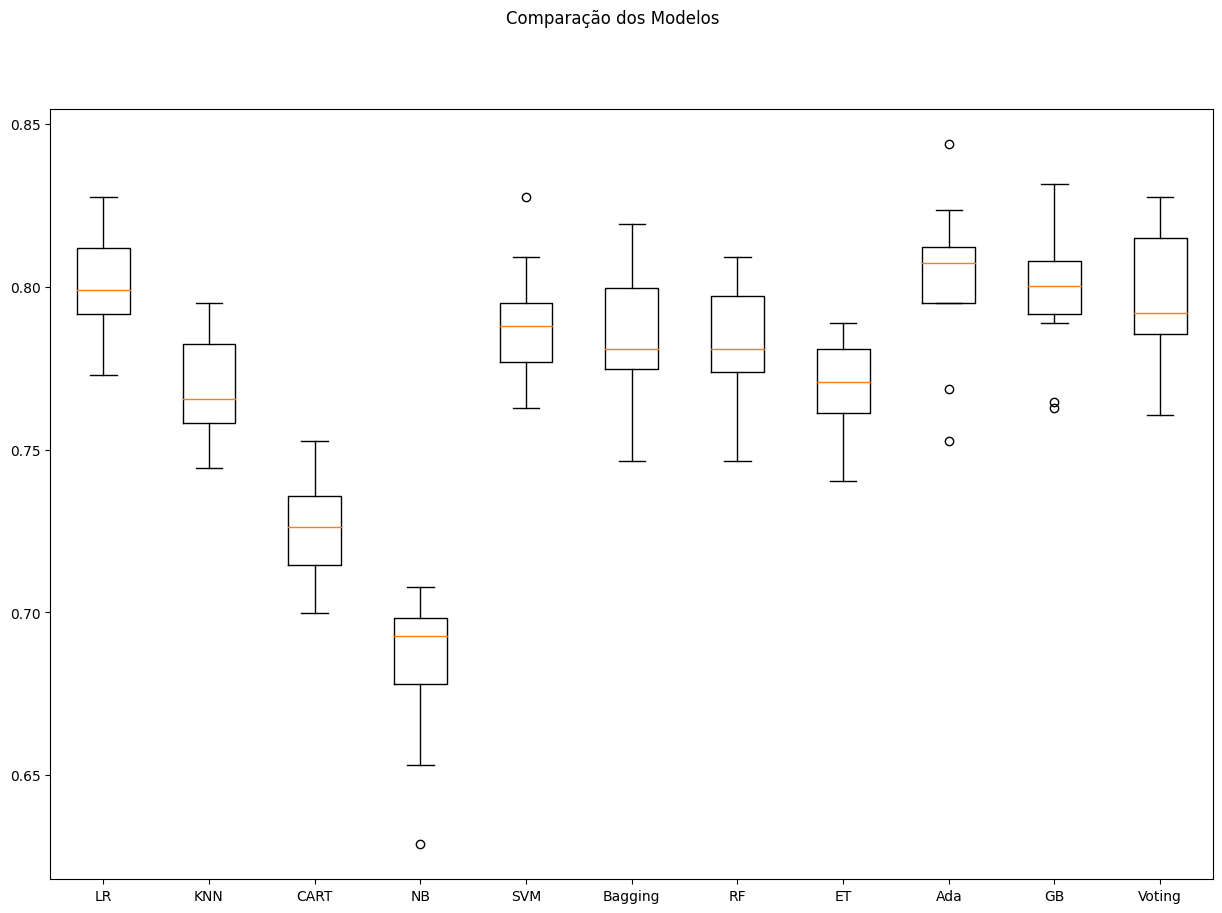

In [120]:
SEED = 42
np.random.seed(SEED) # definindo uma semente global
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=SEED)

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Além da métrica de avaliação "accuracy" também fizemos o teste utilizando a métrica "recall" mas este apresentou resultados próximos à 50% em todos os algoritmos exceto NB. Os resultados do "accuracy" foram satisfatórios e optamos por manter esta métrica.

## **3. Definição de funções**

In [124]:
# processa sequência de estimadores (modelos) de machine learning ou pipelines em uma
# lista de tuplas contendo o 'nome' e o 'modelo/pipeline' correspondente.
# realiza a validação cruzada para cada modelo/pipeline na sequência, imprime os
# resultados e retorna os nomes dos modelos e os resultados das validações cruzadas.
def run_sequences(sequence):
    results = []
    names = []
    for name, model in sequence:
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
        print(msg)

    return names, results

In [125]:
# cria um boxplot dos resultados da validação cruzada de diferentes modelos/pipelines
def box_plot_results(names, results, title):
    fig = plt.figure(figsize=(25,6))
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names, rotation=90)
    plt.show()

In [126]:
#calcula a média dos resultados para cada preditor e retorna o nome do preditor com o menor valor médio.
def find_best_predictor(names, results):
    # Calcula a média dos resultados para cada preditor
    mean_results = [np.mean(r) for r in results]

    # Encontra o índice do preditor com o valor médio mais próximo de zero
    best_index = np.argmin(np.abs(mean_results))

    # Obtém o nome e o valor médio do preditor com melhor desempenho
    best_predictor = names[best_index]
    best_mean = mean_results[best_index]

    # Imprime o resultado
    print("Melhor preditor:", best_predictor)
    print("Valor médio do erro quadrático médio negativo:", best_mean)

    return best_predictor

In [127]:
#recebe dicionários de transformers e de estimators e gera todas as combinações de tuplas de 'pipeline_names' e 'pipelines'
def create_pipelines(transformers, estimators):
    pipelines = []

    for transform_name, transformer in transformers.items():
        for name, estimator in estimators.items():
            pipeline_name = f"{name}-{transform_name}"

            if transformer is None:
                pipeline = Pipeline([(name, estimator)])
            else:
                pipeline = Pipeline([(transform_name, transformer), (name, estimator)])

            pipelines.append((pipeline_name, pipeline))

    return pipelines

In [128]:
# recebe valores de X, determina o escalador apropriado ao melhor cenário, e então retona o rescaledX
def transform_values(X, best_scenario, transformers):
    scaler_key = best_scenario.split('-')[1]
    scaler = transformers.get(scaler_key)

    if scaler is not None:
        scaler.fit(X)
        rescaledX = scaler.transform(X)
    else:
        rescaledX = X

    return rescaledX

# controi um modelo com base no estimador definido no melhor cenário, usando os melhores parametros descobertos através do uso de Grid.
def build_model(best_scenario, best_params):
    estimator_key = next(iter(best_params)).split("__")[0]
    estimator = estimators.get(estimator_key)

    # Remover prefixo 'XX__' dos nomes dos parâmetros
    stripped_best_params = {param.replace(estimator_key + '__', ''): value for param, value in best_params.items()}
    print(estimator_key)
    print(estimator)
    print(stripped_best_params)
    if estimator is not None:
        model = estimator.set_params(**stripped_best_params)
        return model
    else:
        raise ValueError("Estimador não encontrado!")

# imprime o MSE e retorna as predicoes com base em modelo construido com base no melhor cenário e melhores parametros, e dados reescalonados se for o caso.
def run_predictions(X, y, best_scenario, best_params, transformers):
    rescaledX = transform_values(X, best_scenario, transformers)
    model = build_model(best_scenario, best_params)
    model.fit(rescaledX, y)
    predictions = model.predict(rescaledX)
    mse = mean_squared_error(y, predictions)
    mse_neg = -mse
    print("Erro quadrático médio negativo (neg_mean_squared_error) para o dataset:", mse_neg)
    return predictions

# plota um comparativo do dados originais e das predicoes
def plot_predictions(y_nao_vistos, predictions, label):
    # Criar um array de índices para os dados não vistos
    indices = range(len(y_nao_vistos))

    # Plotar o gráfico de comparação
    plt.plot(indices, y_nao_vistos, label=label)
    plt.plot(indices, predictions, label='predictions')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()
    plt.title('Comparação entre ' + label + ' e predictions')
    plt.show()

## **4. Seleção e preparação de estimadores (modelos) e transformers**

In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Definindo os parâmetros do regressor base para o BaggingRegressor
bagging_regressor_base = DecisionTreeRegressor()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingRegressor
voting_regressor_bases = []
voting_regressor_bases.append(('LR', LinearRegression()))
voting_regressor_bases.append(('cart', DecisionTreeRegressor()))
voting_regressor_bases.append(('svm', SVR()))

# Transformações que serão utilizadas
transformers = {
    'orig': None,
    'padr': StandardScaler(),
    'norm': MinMaxScaler()
}

# Algoritmos que serão utilizados
estimators = {
    'LR': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'CART': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Bagging': BaggingRegressor(base_estimator=bagging_regressor_base, n_estimators=num_trees),
    'RF': RandomForestRegressor(n_estimators=num_trees),
    'ET': ExtraTreesRegressor(n_estimators=num_trees),
    'Ada': AdaBoostRegressor(n_estimators=num_trees),
    'GB': GradientBoostingRegressor(n_estimators=num_trees),
    'Vot': VotingRegressor(estimators=voting_regressor_bases)
}


## **5. Comparação de Modelos**

LR: nan (nan)
KNN: nan (nan)
CART: nan (nan)
SVR: nan (nan)
Bagging: nan (nan)
RF: nan (nan)
ET: nan (nan)
Ada: nan (nan)
GB: nan (nan)
Vot: nan (nan)
Melhor preditor: LR
Valor médio do erro quadrático médio negativo: nan


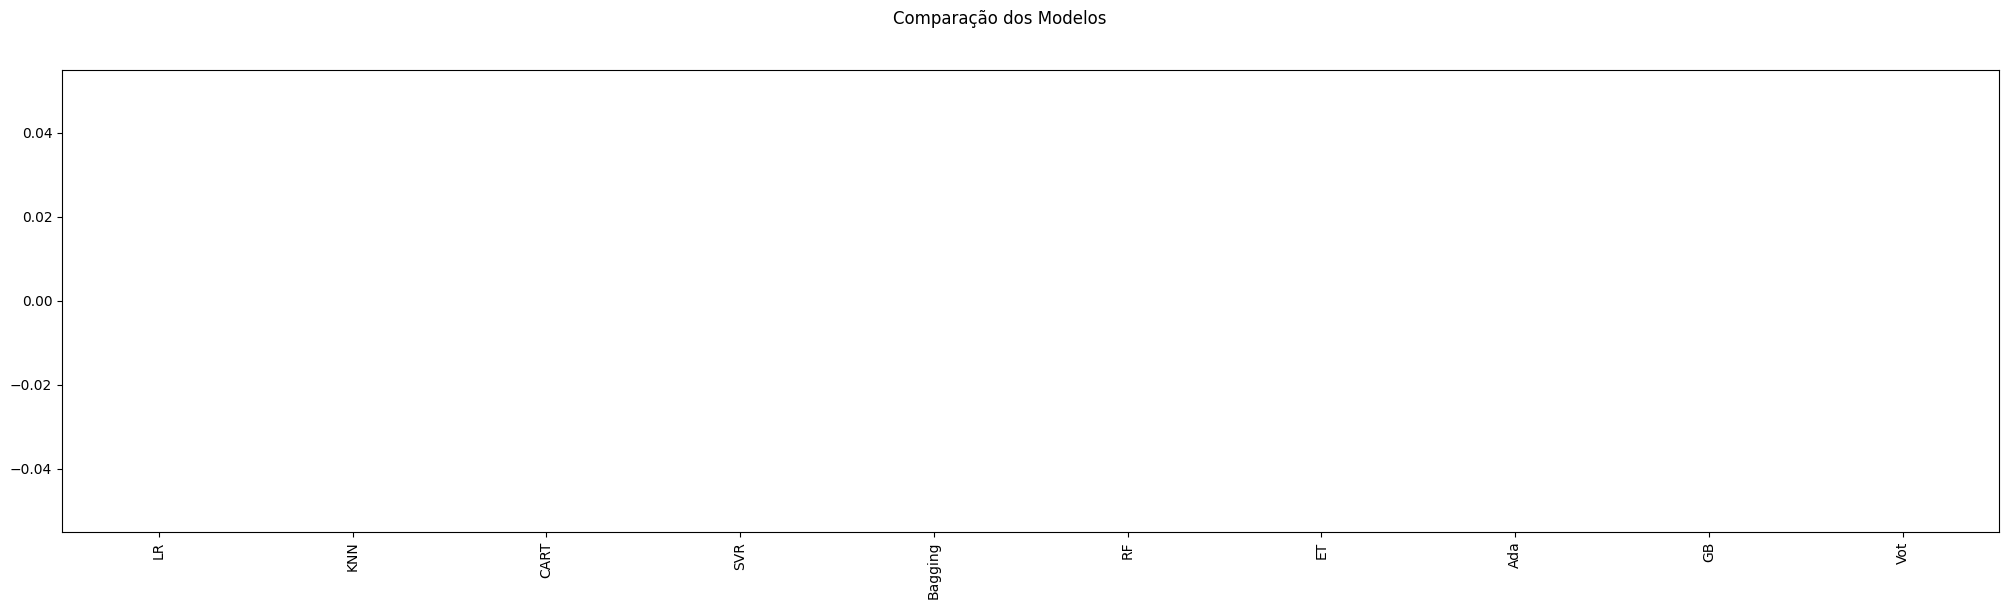

In [130]:
scoring = 'accuracy'
names, results = run_sequences(estimators.items())
best_predictor = find_best_predictor(names, results)
box_plot_results(names, results, 'Comparação dos Modelos')

### 5.1 Comparação dos Modelos - Dataset orginal, padronizado e normalizado

In [ ]:
pipelines = create_pipelines(transformers, estimators)
names, results = run_sequences(pipelines)
best_predictor = find_best_predictor(names, results)
box_plot_results(names, results, 'Comparação dos Modelos - Dataset orginal, padronizado e normalizado')

LR-orig: nan (nan)
KNN-orig: nan (nan)
CART-orig: nan (nan)
SVR-orig: nan (nan)


### 5.2 Ajuste de hiperparâmetros utilizando a função GridSearchCV para encontrar a melhor combinação de hiperparâmetros para os modelos SVR (Support Vector Regression).

In [ ]:
pipelines = []

# Definindo os componentes do pipeline
etr = ('ET', ExtraTreesRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('etr-orig', Pipeline(steps=[etr])))
pipelines.append(('etr-padr', Pipeline(steps=[standard_scaler, etr])))
pipelines.append(('etr-norm', Pipeline(steps=[min_max_scaler, etr])))

param_grid = {
    'ET__n_estimators': [25, 50, 100, 200],
    'ET__max_depth': [None, 10, 20],
}

best_scenario = None
best_params = None
best_score = None

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Cenário: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))
    if best_score is None or grid.best_score_ > best_score:
        best_scenario = name
        best_params = grid.best_params_
        best_score = grid.best_score_

print("Melhor cenário:", best_scenario)
print("Melhores parâmetros:", best_params)

In [ ]:
# Avaliação do modelo com o conjunto de testes
predictions = run_predictions(X_train, y_train, best_scenario, best_params, transformers)
plot_predictions(y_train, predictions, 'y_train')

In [ ]:
# Avaliação do modelo com o conjunto de dados não vistos pelo modelo.
X_teste_best = X_test.iloc[:, :-1].values
y_teste_best = y_test.iloc[:, -1].values

predictions = run_predictions(X_test, y_test, best_scenario, best_params, transformers)
plot_predictions(y_test, predictions, 'y_test')

### 5.3 Aplicando técnica de feature selection

Podemos realizar a selecao de features visando reducao da dimensionalidade, o que facilita a execucao do modelo e pode reduzir problemas de over-fitting.

Será usado o melhor modelo e hiperparametros avaliados, aplicando um dataset com menos features.

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Criação do modelo
modelo = build_model(best_scenario, best_params)
#modelo = ExtraTreesRegressor(max_depth=None, n_estimators=50)

# Seleção de atributos com base na importância
selector = SelectFromModel(modelo, threshold=-np.inf, max_features=1)
selector.fit(X_train, y_train)

# Reduz X para os atributos selecionados
features = selector.transform(X_train)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:13])

# Exibe os atributos selecionados
print("\nAtributos Selecionados:", selector.get_support(indices=True))
print("\nNomes dos Atributos Selecionados:", dataset.columns[selector.get_support(indices=True)].tolist())

In [ ]:
# Avaliação do modelo com o conjunto de dados não vistos pelo modelo, usando feature selection.

X_nao_vistos_feature_selected = selector.transform(X_nao_vistos)
predictions = run_predictions(X_nao_vistos_feature_selected, y_nao_vistos, best_scenario, best_params, transformers)
plot_predictions(y_nao_vistos, predictions, 'y_nao_vistos')

## **6. Conclusão**

Foi possível realizar a comparacao de diversos modelos de machine learning aplicáveis em problemas de regressao, tendo sido possível determinar o melhor estimador, no melhor cenário (original, padrão, normalizado) e os melhores hiperparametros que conseguem predizer o valor do alvo, com o menor nível de erro, o que podemos considerar como o melhor modelo para tratar o problema apresentado.

Além disso, foi possível avaliar que ao ser selecionada a melhor feature e usando apenas esta feature, o melhor modelo foi capaz de realizar ótimas prediçoes para o valor médio das casas, com baixo nível de erro.